In [30]:
# Get the data
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sumit17125/red-wine-quality-dataset")

print("Path to dataset files:", path)


Path to dataset files: /home/jovyan/.cache/kagglehub/datasets/sumit17125/red-wine-quality-dataset/versions/1


In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split


# Model
import tensorflow as tf
from keras.models import Sequential
from keras.layers import  Dense, Dropout

# Metrics
from sklearn.metrics import classification_report, confusion_matrix

# Tree-based models
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier


In [32]:
dataset  = pd.read_csv("/home/jovyan/.cache/kagglehub/datasets/sumit17125/red-wine-quality-dataset/versions/1/winequality-red.csv", sep=";")


In [33]:
# EDA 
dataset.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [34]:
dataset.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [35]:
dataset.isna().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [36]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<Axes: >

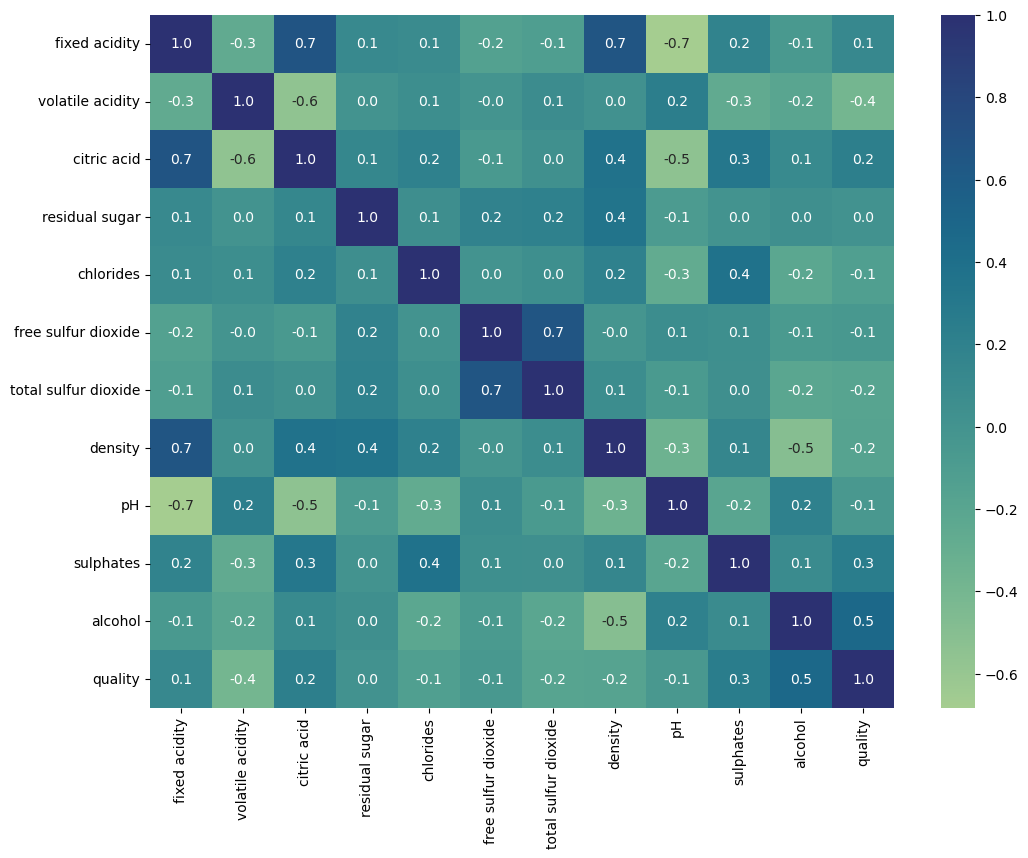

In [37]:
plt.figure(figsize=(12,9))
sns.heatmap(dataset.corr(numeric_only=True),annot=True, fmt=".1f", cmap="crest")

(array([  2.,  27., 134., 361., 555., 352., 132.,  29.,   3.,   4.]),
 array([2.74 , 2.867, 2.994, 3.121, 3.248, 3.375, 3.502, 3.629, 3.756,
        3.883, 4.01 ]),
 <BarContainer object of 10 artists>)

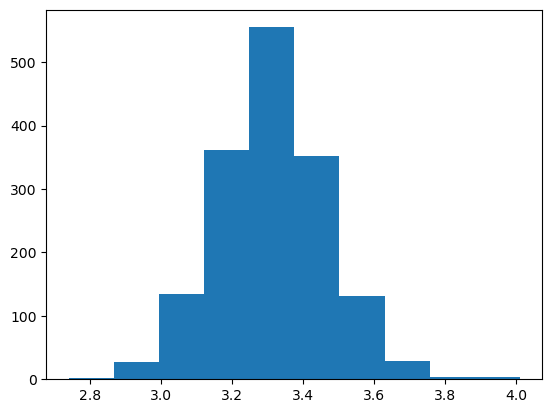

In [38]:
plt.hist(dataset["pH"])

<Axes: xlabel='quality'>

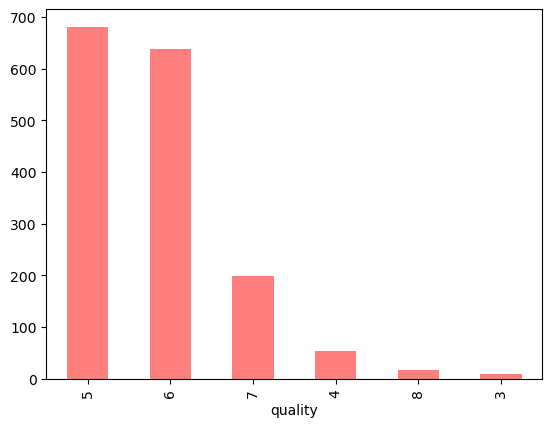

In [39]:
dataset["quality"].value_counts().plot(kind="bar", color="red", alpha=0.5)

In [40]:
dataset["quality"].unique()

array([5, 6, 7, 4, 8, 3])

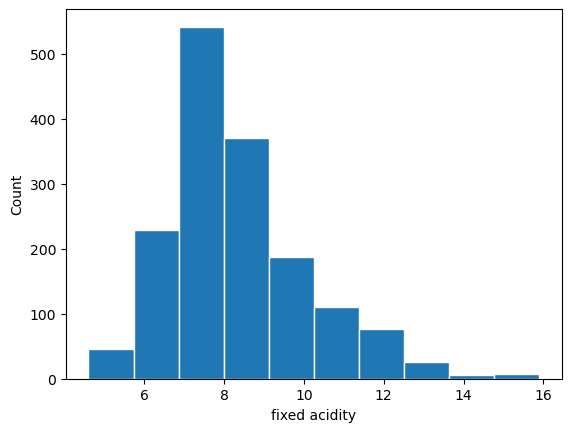

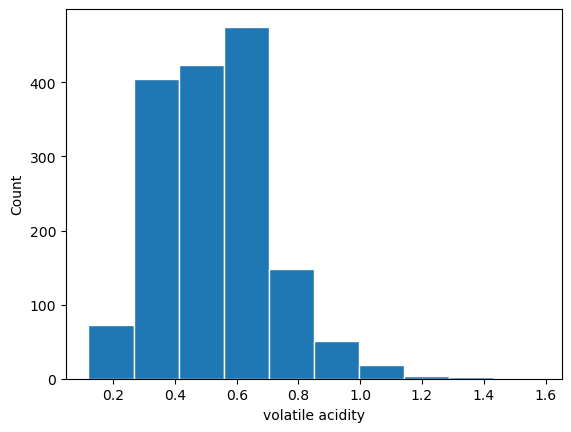

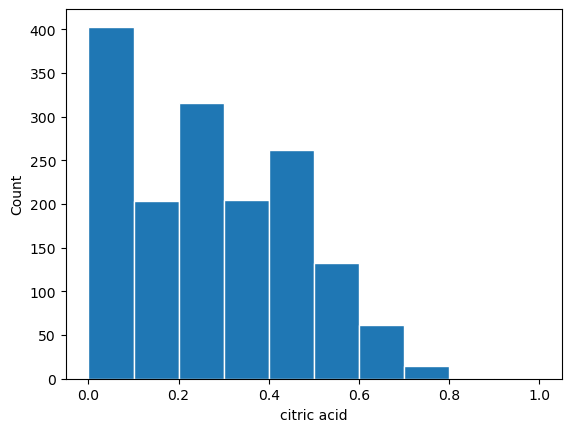

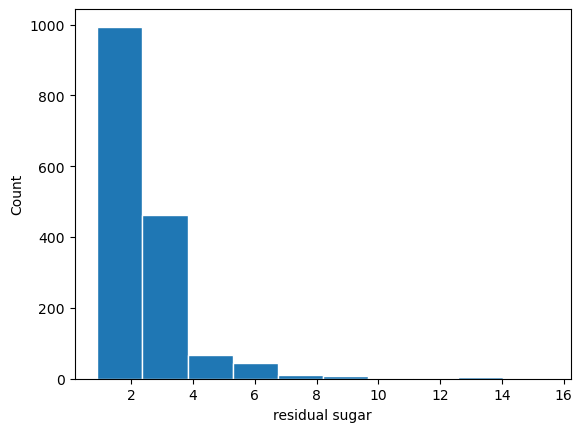

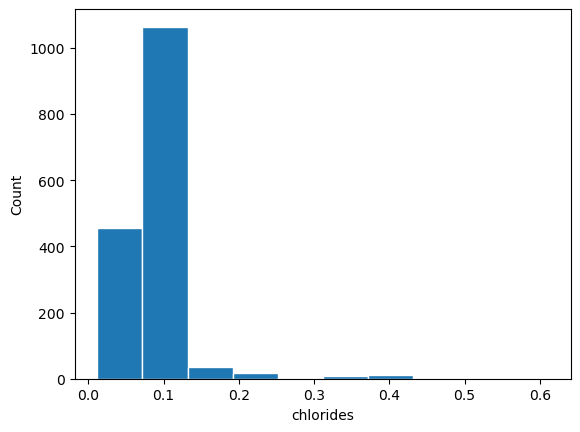

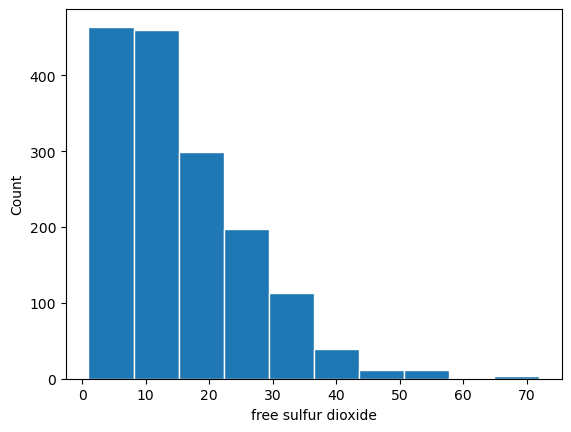

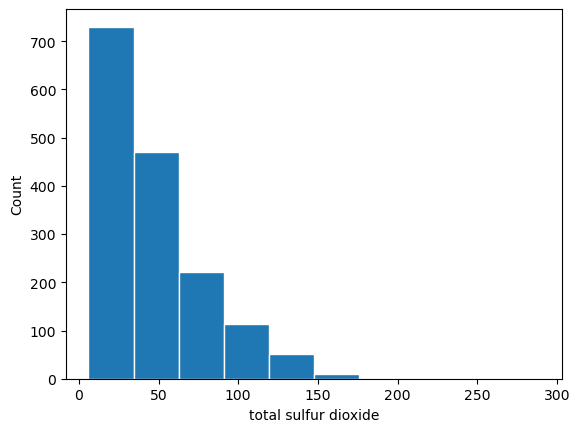

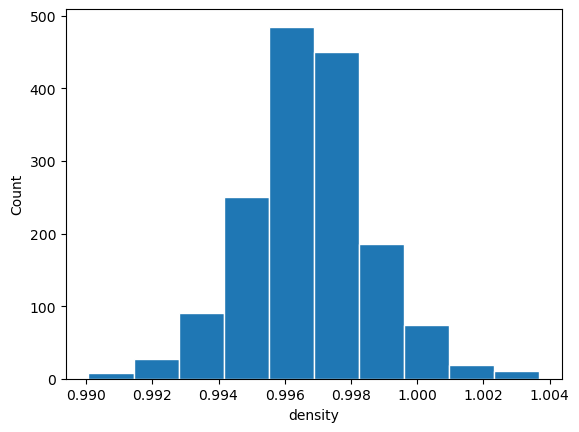

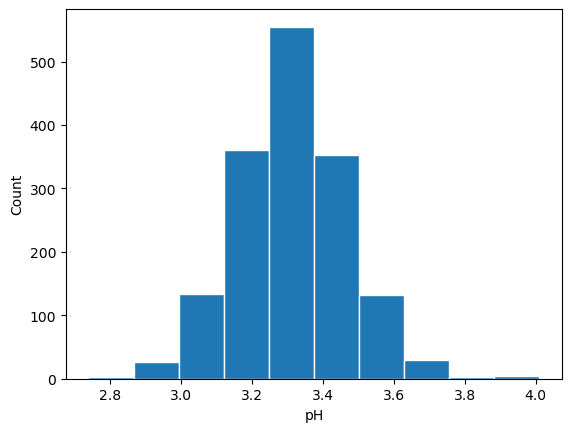

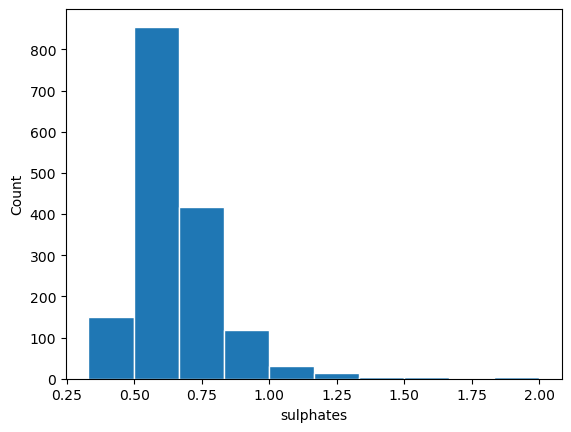

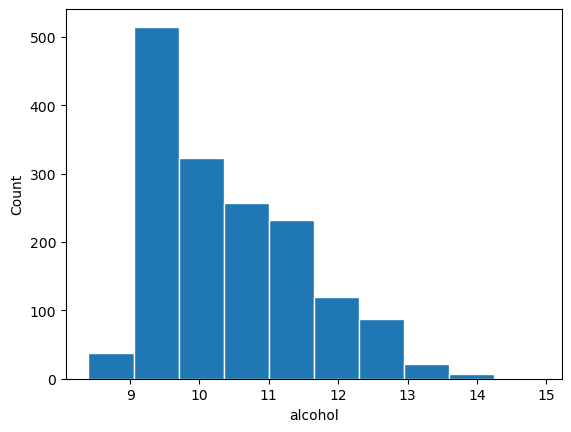

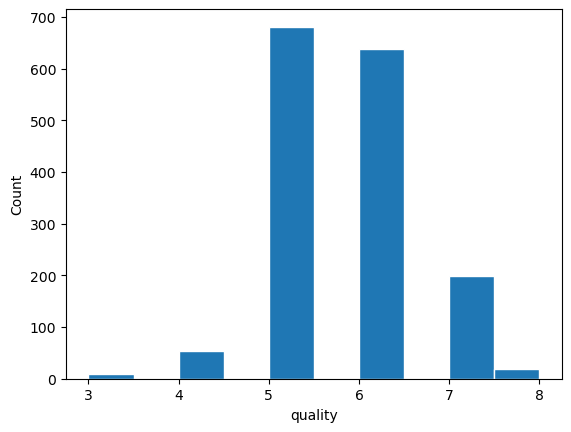

In [41]:


for i in dataset:
    plt.hist(dataset[i],bins=10, edgecolor="white")

    plt.ylabel("Count")
    plt.xlabel(i)
    plt.show()

In [42]:
# So we see here the quality is highly imbalanced. So we need to make it balanced

dataset = dataset.drop_duplicates()

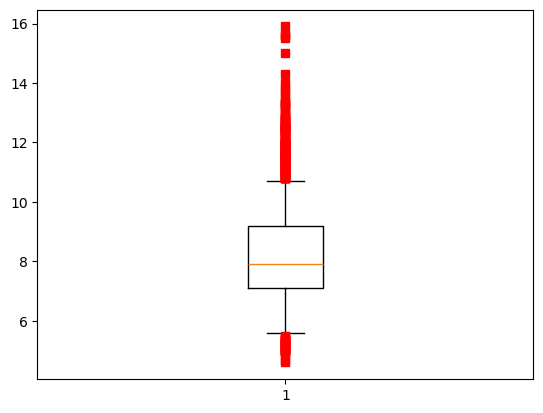

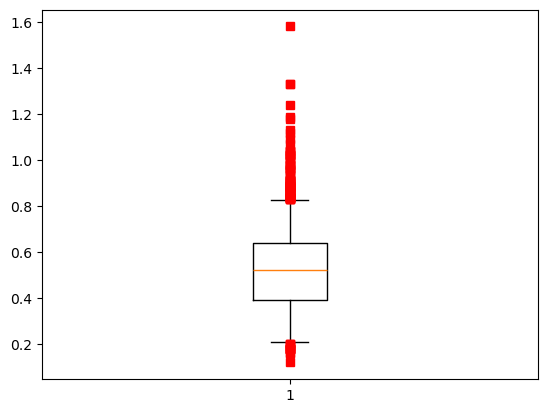

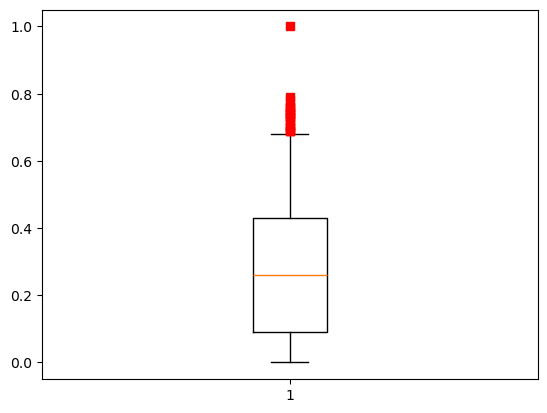

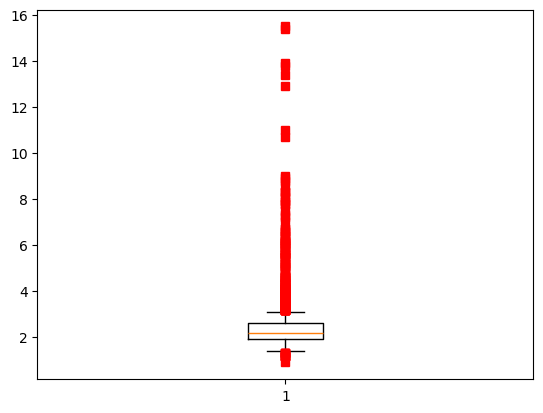

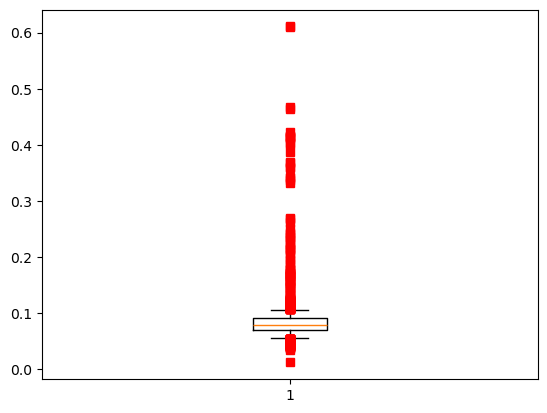

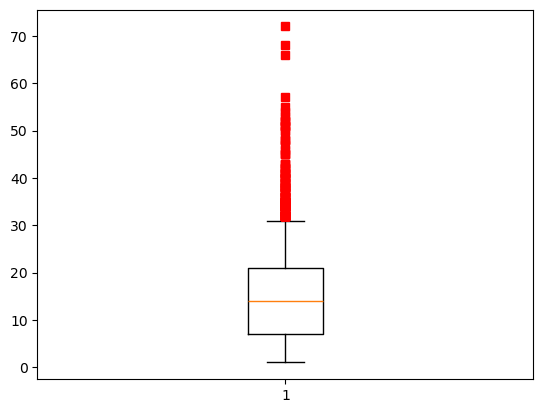

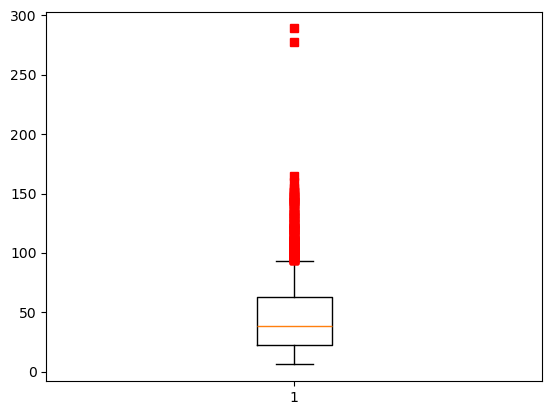

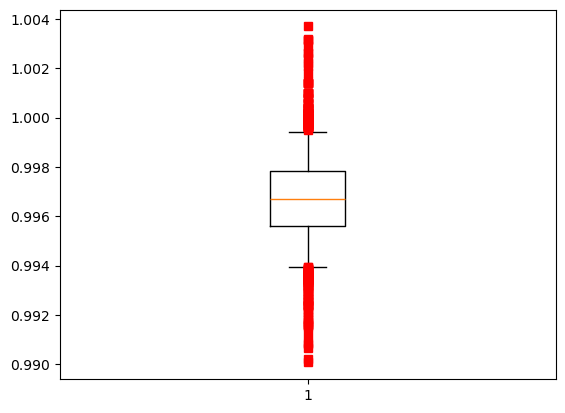

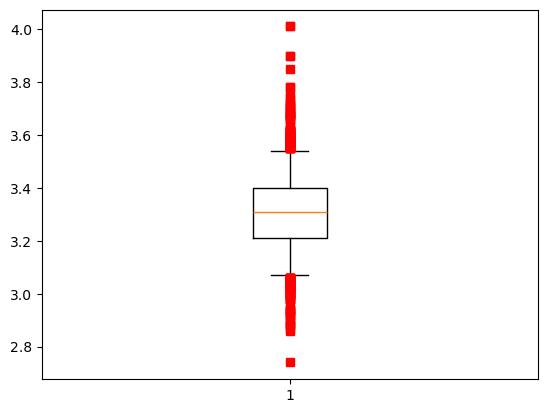

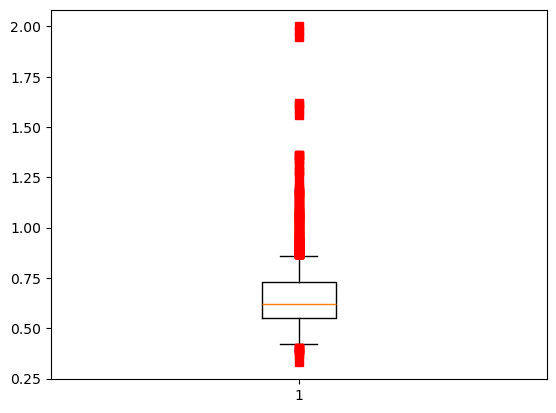

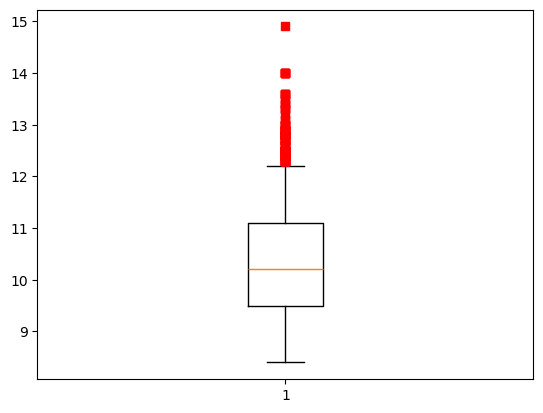

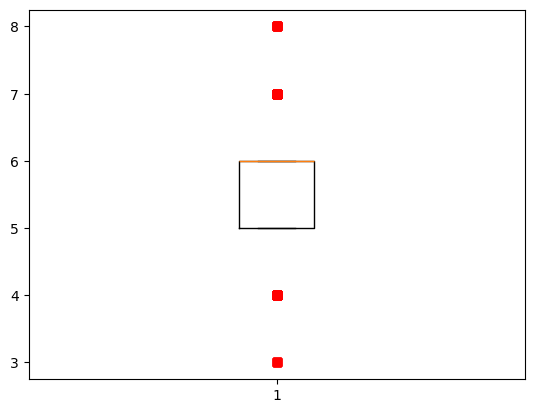

In [43]:
for i in dataset:

    plt.boxplot(dataset[i], sym='rs', whis=0.75)


    plt.show()

In [44]:
# Remap labels from [3–8] to [0–5]
label_map = {label: idx for idx, label in enumerate(sorted(dataset["quality"].unique()))}
dataset["quality"] = dataset["quality"].map(label_map)

In [45]:
# Split data
X = dataset.drop(['quality'], axis=1)
y = dataset["quality"]


# Apply Scaler
rs = RobustScaler()
X = rs.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [46]:
model = Sequential([
    Dense(128, activation="relu", input_shape=(X_train.shape[1],)),
    Dropout(0.4),
    Dense(64, activation="relu"),
    Dropout(0.3),
    Dense(32, activation="relu"),
    Dense(6, activation="softmax")
])

/opt/conda/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [48]:
history = model.fit(X_train, y_train ,epochs=50,verbose=1,validation_split=0.2)

Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.3008 - loss: 1.6936 - val_accuracy: 0.5196 - val_loss: 1.3788
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4918 - loss: 1.3402 - val_accuracy: 0.5147 - val_loss: 1.2364
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5454 - loss: 1.1960 - val_accuracy: 0.5245 - val_loss: 1.1557
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5816 - loss: 1.1089 - val_accuracy: 0.5196 - val_loss: 1.1105
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5917 - loss: 1.1374 - val_accuracy: 0.5392 - val_loss: 1.0853
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5459 - loss: 1.1125 - val_accuracy: 0.5392 - val_loss: 1.0927
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6056 - loss: 0.9774 - val_accuracy: 0.5490 - val_loss: 1.0743
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5848 - loss: 1.0413 - val_accuracy: 0.5784 - val_loss

In [49]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print("Test accuracy:", accuracy)

# Predict the model
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_pred[:10], y_test[:10]

# Classification report
print(classification_report(y_test, y_pred))
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5700 - loss: 1.0608
Test accuracy: 0.5529412031173706
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00        13
           2       0.65      0.65      0.65       153
           3       0.49      0.58      0.53       133
           4       0.42      0.30      0.35        37
           5       0.00      0.00      0.00         2

    accuracy                           0.55       340
   macro avg       0.26      0.25      0.26       340
weighted avg       0.53      0.55      0.54       340



/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

### Why this model have a lower accuracy. It's because datta is higly skewed, confuse gradient-based model like neural network. Make it harder to learn.

1. We can use Tree-base model like Random Forest, XGBoost, LightGBM, and Gradient Boosted Trees
2. We can balancing the data using Log-Transformation or Drop-Combine features 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)



rf = RandomForestClassifier(n_estimators=200, class_weight='', random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6029411764705882
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00        13
           2       0.67      0.74      0.70       144
           3       0.55      0.64      0.60       134
           4       0.52      0.31      0.39        42
           5       0.00      0.00      0.00         4

    accuracy                           0.60       340
   macro avg       0.29      0.28      0.28       340
weighted avg       0.57      0.60      0.58       340



/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


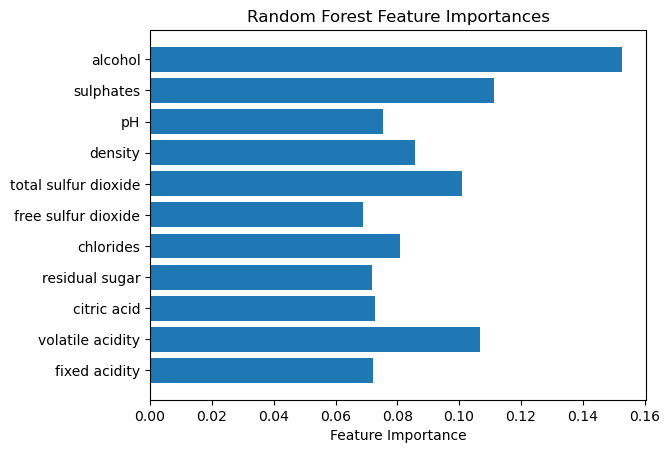

In [55]:
import matplotlib.pyplot as plt

importances = rf.feature_importances_
features = dataset.drop('quality', axis=1).columns

plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importances")
plt.show()